In [30]:
import re 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [ ]:
data_files = os.listdir()
data_files = [f for f in data_files if f.endswith('csv')]

meat_files = [f for f in data_files if 'Meat' in f]
meat_files

In [ ]:
df=pd.read_csv('Meat_Stats_Meat_Production.csv')
df['Date'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Production'] = df['Production'].str.replace(',', '').astype(float)

groups = df.groupby('Animal')
for name, group in groups:

    plt.plot(group.index, group['Production'], label=name) 
    plt.xlabel('Time')
    plt.ylabel(f'Production of {name}')
    plt.title(f'Production of {name} over time')
    plt.show()

In [ ]:
df=pd.read_csv('Meat_Stats_Meat_Production.csv')
df['Date'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Production'] = df['Production'].str.replace(',', '').astype(float)
df['Production_Change'] = df['Production'].pct_change() * 100

df = df[df.index >= '2014-01-01']
df = df[df.index < '2023-12-01']
covid_start = pd.to_datetime('2020-03-11')
russia_ukraine_start = pd.to_datetime('2022-02-24')
suez_blockage = pd.to_datetime('2021-03-23')

groups = df.groupby('Animal')
for name, group in groups:
    plt.figure(figsize=(12, 6))
    inspection_groups = group.groupby('Commercial or Federally Inspected')

    for inspection_name, inspection_group in inspection_groups:
        print(name, inspection_name)
        plt.plot(inspection_group.index, inspection_group['Production_Change'], label=f'{name} - {inspection_name}')

    plt.axvline(covid_start, color='r', linestyle='--', label='COVID-19')
    plt.axvline(russia_ukraine_start, color='b', linestyle='--', label='Russia-Ukraine')
    plt.axvline(suez_blockage, color='g', linestyle='--', label='Suez Canal')

    plt.legend(loc='upper left')
    plt.xlabel('Time')
    plt.ylabel(f'% change in production of {name}')
    plt.title(f'% change in production of {name} over time')
    plt.show()
    plt.clf()

/var/folders/tw/pjkwgn1n1750q10spmv865w40000gn/T/ipykernel_66985/4019653075.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Production_Change'] = df['Production'].pct_change() * 100


Beef Commercial
Beef Federally Inspected


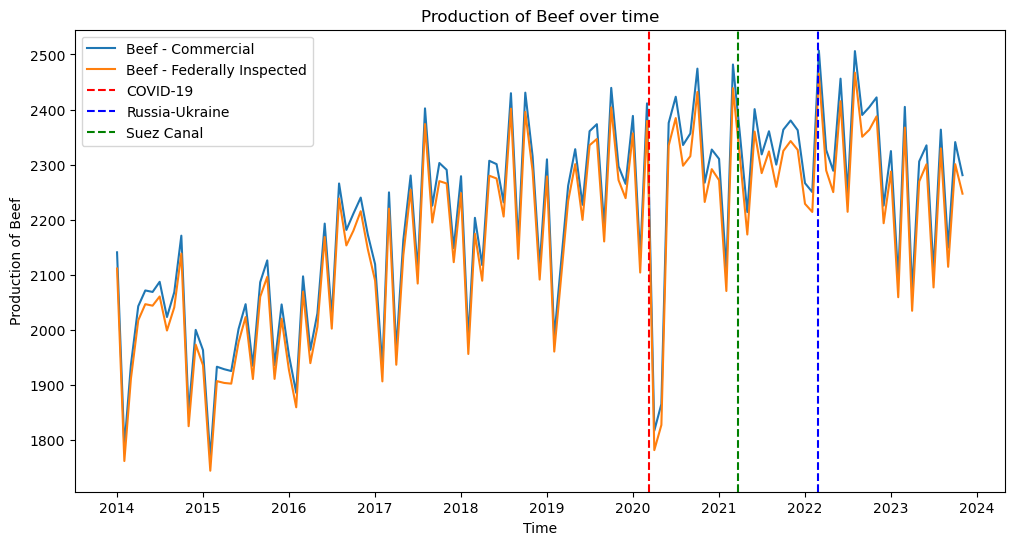

Broilers Federally Inspected


<Figure size 640x480 with 0 Axes>

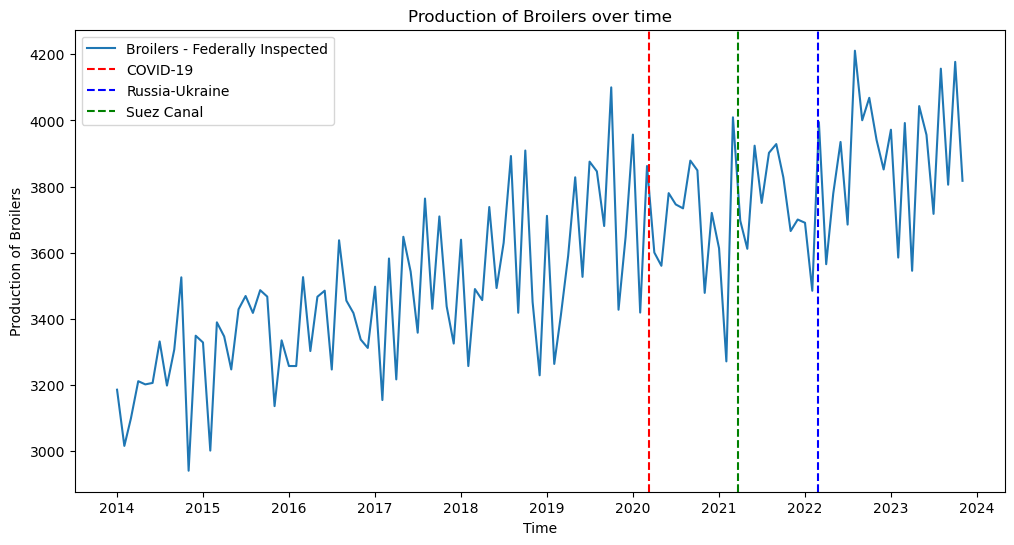

Lamb and Mutton Commercial
Lamb and Mutton Federally Inspected


<Figure size 640x480 with 0 Axes>

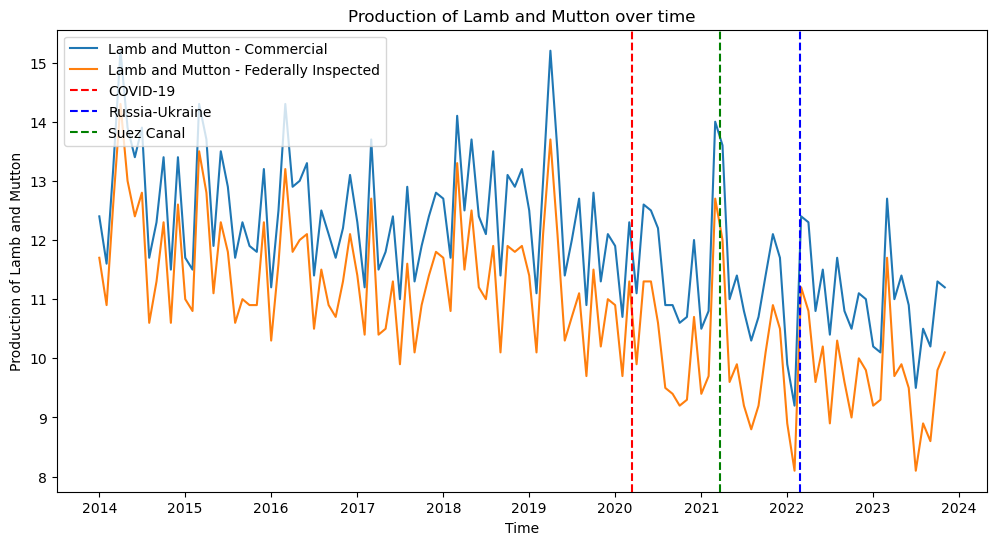

Other Chicken Federally Inspected


<Figure size 640x480 with 0 Axes>

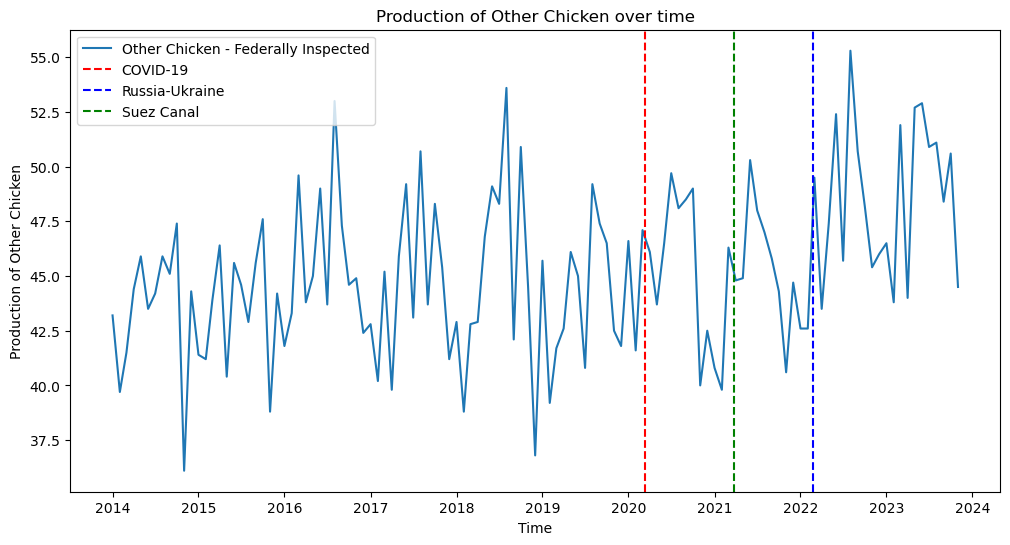

Pork Commercial
Pork Federally Inspected


<Figure size 640x480 with 0 Axes>

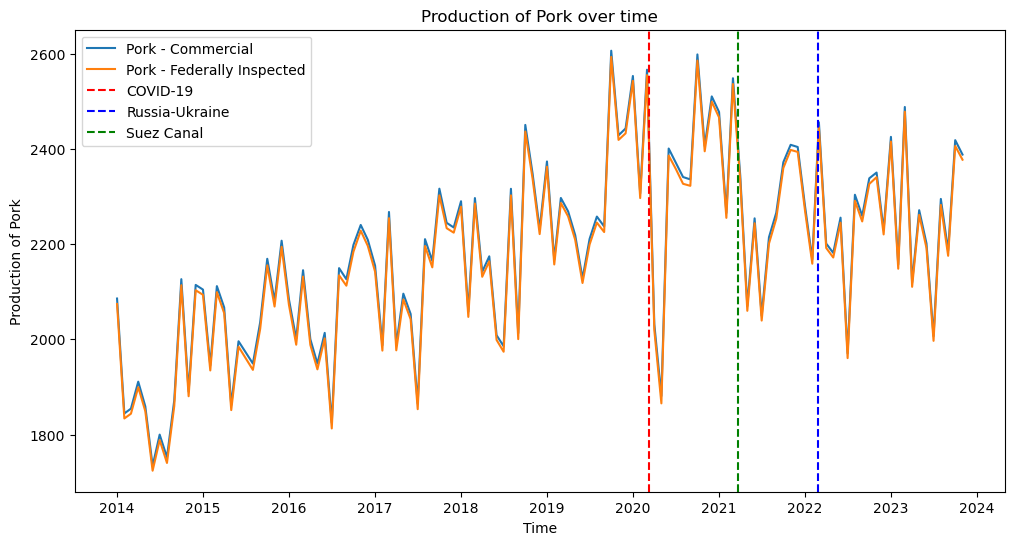

Turkey Federally Inspected


<Figure size 640x480 with 0 Axes>

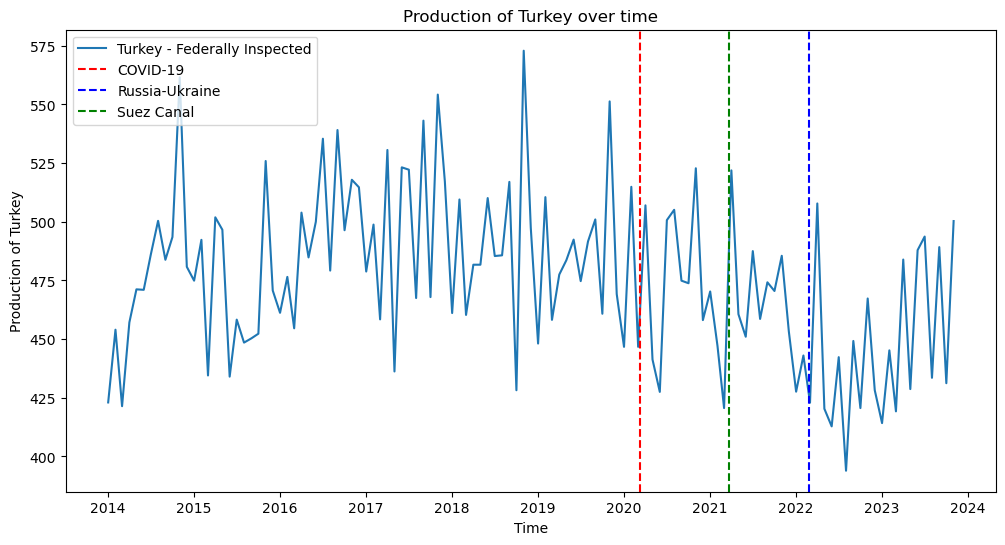

Veal Commercial
Veal Federally Inspected


<Figure size 640x480 with 0 Axes>

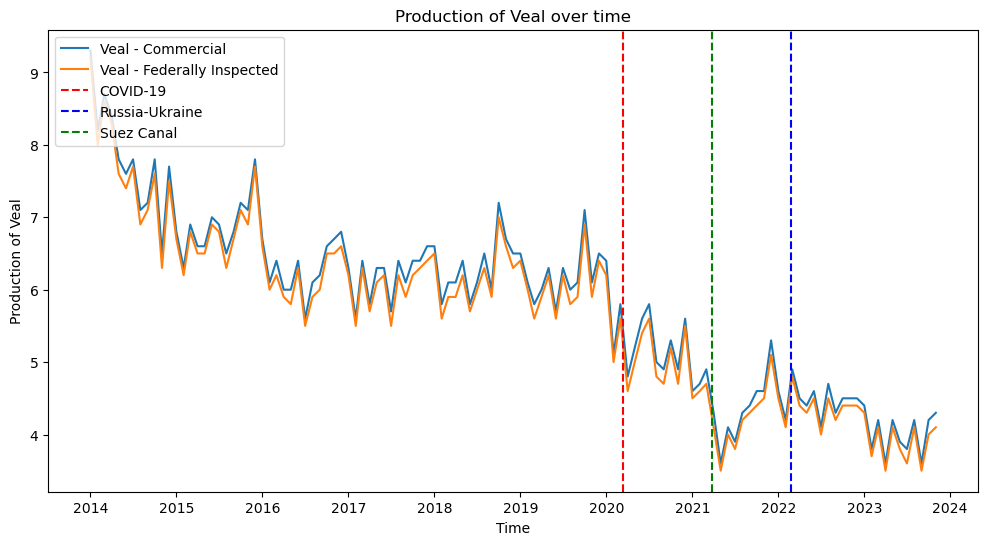

<Figure size 640x480 with 0 Axes>

In [36]:
df=pd.read_csv('Meat_Stats_Meat_Production.csv')
df['Date'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Production'] = df['Production'].str.replace(',', '').astype(float)
df['Production_Change'] = df['Production'].pct_change() * 100

df = df[df.index >= '2014-01-01']
df = df[df.index < '2023-12-01']
covid_start = pd.to_datetime('2020-03-11')
russia_ukraine_start = pd.to_datetime('2022-02-24')
suez_blockage = pd.to_datetime('2021-03-23')

groups = df.groupby('Animal')
for name, group in groups:
    plt.figure(figsize=(12, 6))
    inspection_groups = group.groupby('Commercial or Federally Inspected')

    for inspection_name, inspection_group in inspection_groups:
        print(name, inspection_name)
        plt.plot(inspection_group.index, inspection_group['Production'], label=f'{name} - {inspection_name}')

    plt.axvline(covid_start, color='r', linestyle='--', label='COVID-19')
    plt.axvline(russia_ukraine_start, color='b', linestyle='--', label='Russia-Ukraine')
    plt.axvline(suez_blockage, color='g', linestyle='--', label='Suez Canal')

    plt.legend(loc='upper left')
    plt.xlabel('Time')
    plt.ylabel(f'Production of {name}')
    plt.title(f'Production of {name} over time')
    plt.show()
    plt.clf()

Beef Commercial
Beef Federally Inspected


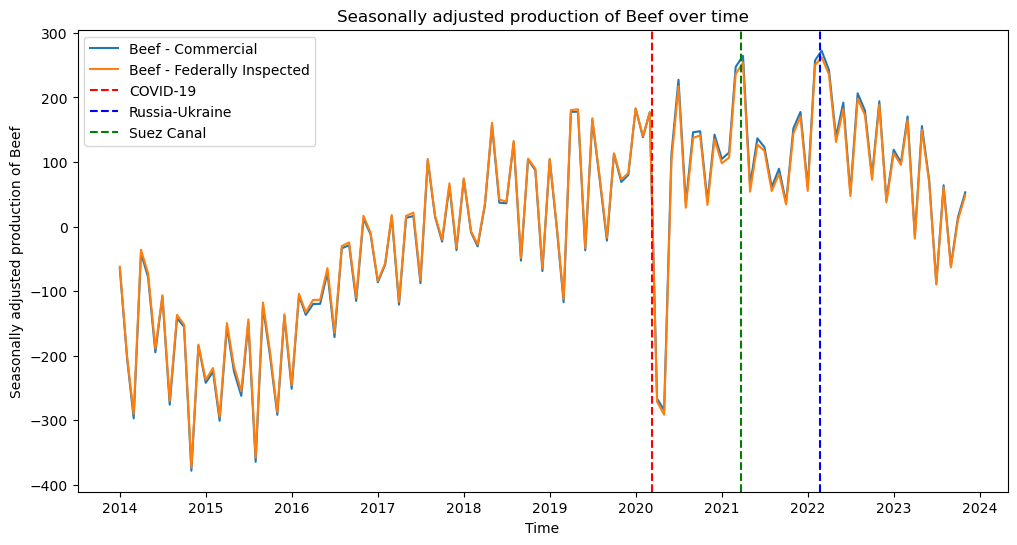

Broilers Federally Inspected


<Figure size 640x480 with 0 Axes>

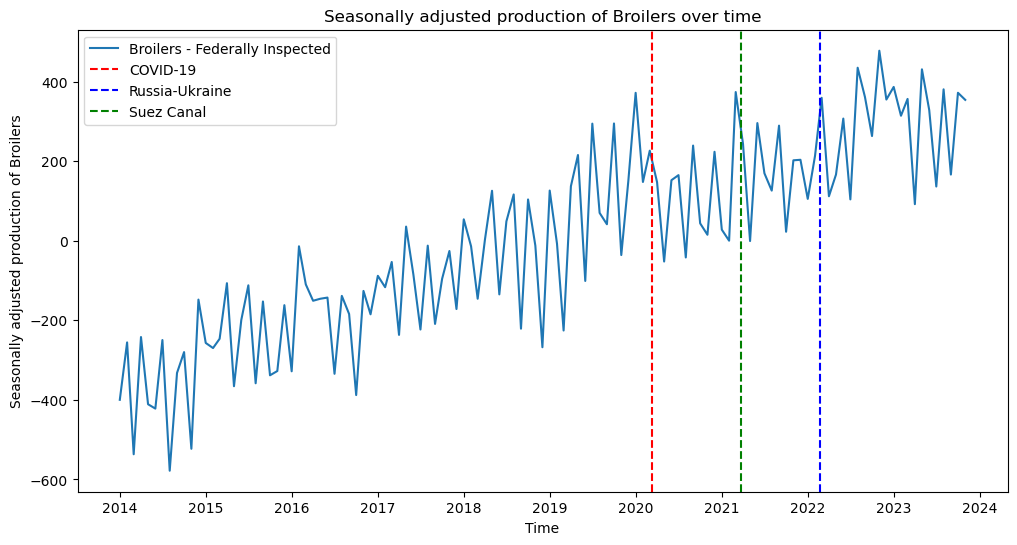

Lamb and Mutton Commercial
Lamb and Mutton Federally Inspected


<Figure size 640x480 with 0 Axes>

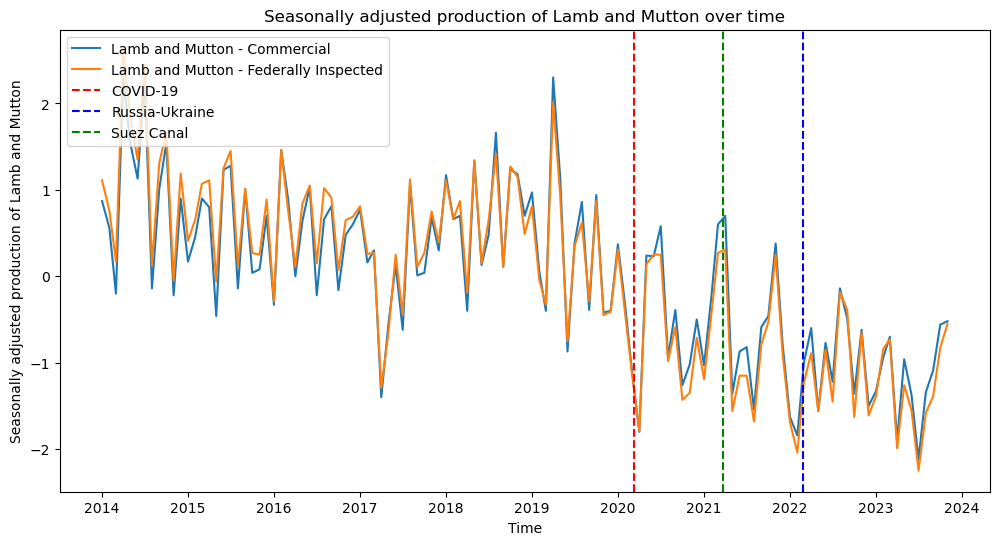

Other Chicken Federally Inspected


<Figure size 640x480 with 0 Axes>

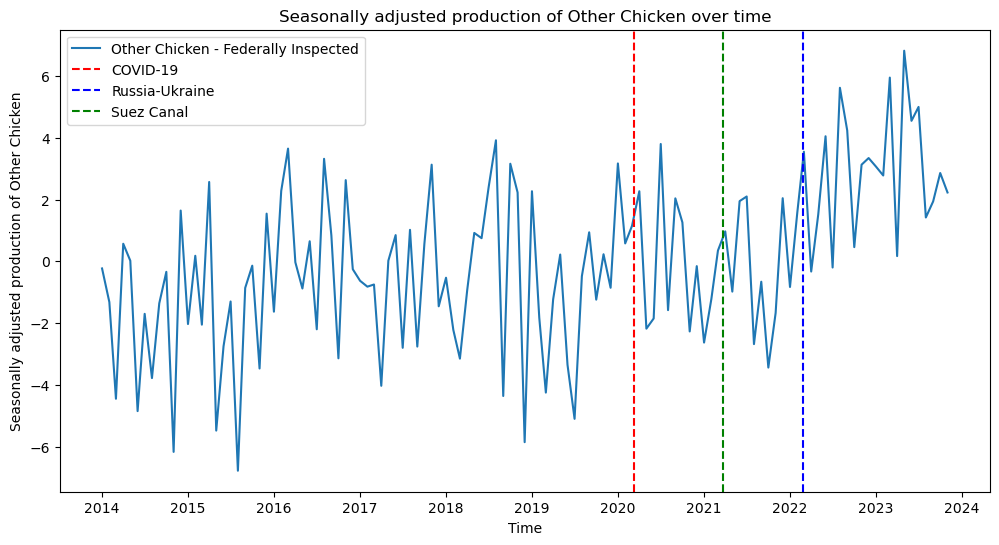

Pork Commercial
Pork Federally Inspected


<Figure size 640x480 with 0 Axes>

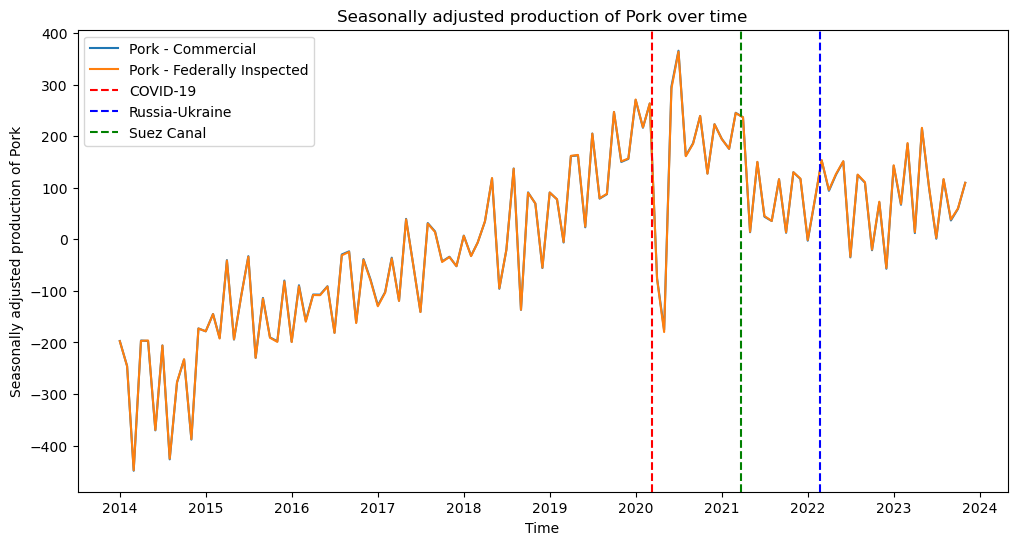

Turkey Federally Inspected


<Figure size 640x480 with 0 Axes>

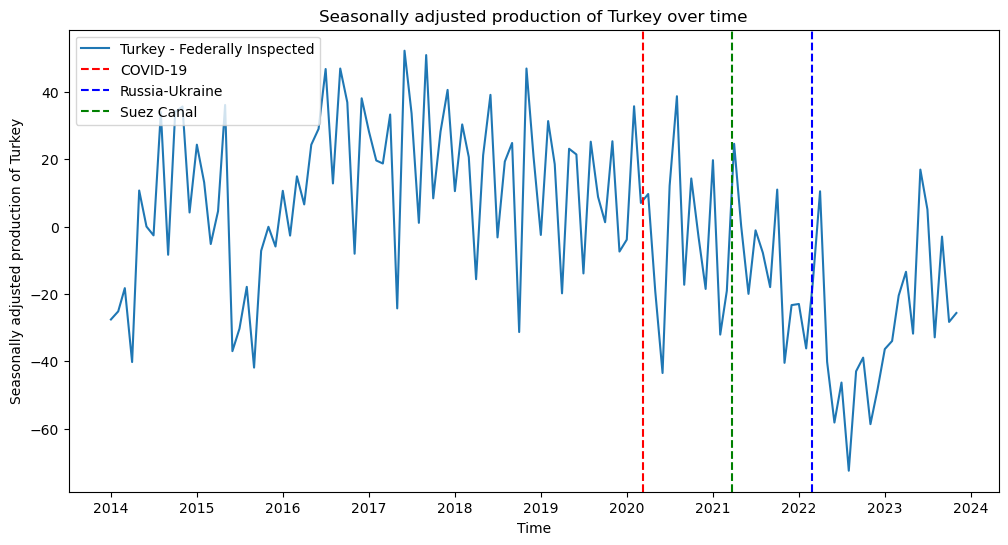

Veal Commercial
Veal Federally Inspected


<Figure size 640x480 with 0 Axes>

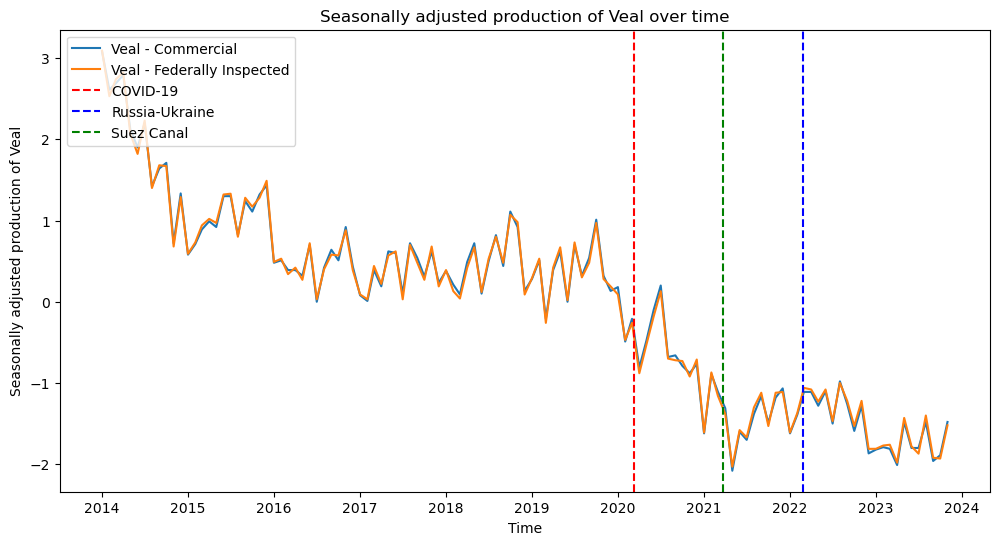

<Figure size 640x480 with 0 Axes>

In [38]:
# Fine to drop these rows just for predicting the seasonal impact, probably no bias across the NA rows
df = pd.read_csv('Meat_Stats_Meat_Production.csv')
df['Date'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Production'] = df['Production'].str.replace(',', '').astype(float)
df = df[df.index >= '2014-01-01']
df = df[df.index < '2023-12-01']

groups = df.groupby('Animal')
for name, group in groups:
    plt.figure(figsize=(12, 6))
    inspection_groups = group.groupby('Commercial or Federally Inspected')

    for inspection_name, inspection_group in inspection_groups:
        inspection_group['Month'] = inspection_group.index.month
        month_dummies = pd.get_dummies(inspection_group['Month'], prefix='Month', drop_first=False)
        X = month_dummies.loc[inspection_group['Production'].notna()]
        y=inspection_group['Production'].dropna()
        model = sm.OLS(y, X).fit()

        inspection_group['Production_Adjusted'] = y - model.predict(X)
        plt.plot(inspection_group.index, inspection_group['Production_Adjusted'], label=f'{name} - {inspection_name}')

    plt.axvline(covid_start, color='r', linestyle='--', label='COVID-19')
    plt.axvline(russia_ukraine_start, color='b', linestyle='--', label='Russia-Ukraine')
    plt.axvline(suez_blockage, color='g', linestyle='--', label='Suez Canal')

    plt.legend(loc='upper left')
    plt.xlabel('Time')
    plt.ylabel(f'Seasonally adjusted production of {name}')
    plt.title(f'Seasonally adjusted production of {name} over time')
    plt.show()
    plt.clf()

In [ ]:
df=pd.read_csv('Meat_Stats_Meat_Production.csv')
df['Date'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Production'] = df['Production'].str.replace(',', '').astype(float)

groups = df.groupby('Animal')
for name, group in groups:

    plt.plot(group.index, group['Production'], label=name)  # Use label for legend
    plt.xlabel('Time')
    plt.ylabel(f'Production of {name}')
    plt.title(f'Production of {name} over time')
    plt.show()

In [ ]:
df=pd.read_csv('Meat_Stats_Cold_Storage.csv')
df['Date'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)

groups = df.groupby('Animal')
for name, group in groups:
    plt.plot(group.index, group['Weight'], label=name)  # Use label for legend
    plt.xlabel('Time')
    plt.ylabel(f'Storage of {name}')
    plt.title(f'Storage of {name} over time')
    plt.show()

In [ ]:
counts_df=pd.read_csv('Meat_Stats_Slaughter_Counts.csv')
counts_df['Date'] = counts_df['Month'].astype(str) + '-' + counts_df['Year'].astype(str)
counts_df['Date'] = pd.to_datetime(counts_df['Date'], format='%m-%Y')
counts_df.set_index('Date', inplace=True)
counts_df['Count'] = counts_df['Count'].str.replace(',', '').astype(float)

groups_counts = counts_df.groupby('Animal')
for name, group in groups_counts:
    plt.plot(group.index, group['Count'], label=name)  # Use label for legend
    plt.xlabel('Time')
    plt.ylabel(f'Count of {name}')
    plt.title(f'Slaughter counts of {name} over time')
    plt.show()

In [ ]:
df=pd.read_csv('Meat_Stats_Slaughter_Weights.csv')
df['Date'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Weight'] = df['Weight'].str.replace(',', '').astype(float)
df = df[df['Live_Or_Dressed'] == 'Live']
covid_start = pd.to_datetime('2020-03-11')
russia_ukraine_start = pd.to_datetime('2022-02-24')
suez_blockage = pd.to_datetime('2021-03-23')

groups = df.groupby('Animal')
for name, group in groups:
    inspection_groups = group.groupby('Commercial_Or_Federally_Inspected')

    for inspection_name, inspection_group in inspection_groups:
        print(name, inspection_name)
        plt.plot(inspection_group.index, inspection_group['Weight'], label=f'{name} - {inspection_name}')

    plt.axvline(covid_start, color='r', linestyle='--', label='COVID-19 Pandemic')
    plt.axvline(russia_ukraine_start, color='b', linestyle='--', label='Russia-Ukraine War')
    plt.axvline(suez_blockage, color='g', linestyle='--', label='Suez Canal Blockage')

    plt.legend()
    plt.xlabel('Time')
    plt.ylabel(f'Average slaughter weight of {name}')
    plt.title(f'Average slaughter weights of {name} over time')
    plt.show()
    plt.clf()

# Broilers and other chickens
broilers = df.groupby('Animal').get_group('Broilers')
other_chicks = df.groupby('Animal').get_group('Other Chickens')

plt.plot(broilers.index, broilers['Weight'], label='Broilers')
plt.plot(other_chicks.index, other_chicks['Weight'], label='Other chickens')
plt.xlabel('Time')
plt.ylabel(f'Average slaughter weight of chicken')
plt.title(f'Average slaughter weights of chickens over time')
plt.legend()
plt.show()